In [1]:
# !pip install brewer2mpl
# import necessary package

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}


plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

In [2]:
!ls

README.md                              baseline_model.ipynb
Zillow’s Home Value Prediction.ipynb   data_6037.csv


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('data_6037.csv')

In [5]:
data.head()

,Unnamed: 0,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,censustractandblock,logerror
0,108,-0.260985,-0.872478,0.506341,-0.904228,-0.62427,0.442336,-1.716129,0.434097,0.744461,-1.261122,-0.398618,-0.012752,-0.149415,0.866121,-0.522849,-1.000211,-0.005547,-0.037763
1,109,-0.260985,-0.872478,-0.026313,-0.904228,-0.62427,0.442336,-1.716129,0.434097,0.744461,-1.261122,-0.398618,-0.012752,-0.149415,0.866121,-0.518923,0.999789,-0.005547,-0.037763
2,110,0.691786,-0.872478,-1.091620,-0.523124,-0.62427,0.428069,-1.831541,1.537401,0.744461,-1.258010,0.000000,-0.012752,-0.149415,0.785900,-0.257594,-1.000211,-0.005540,-0.024208
3,111,0.691786,-0.872478,1.038995,-0.523124,-0.62427,0.428069,-1.831541,1.537401,0.744461,-1.258010,0.000000,-0.012752,-0.149415,0.785900,0.012040,0.999789,-0.005540,-0.024208
4,112,0.691786,-0.026785,-1.091620,0.761100,-0.62427,0.374222,-1.826925,0.180657,0.744461,-1.258010,-0.398618,-0.002535,-0.149415,0.745789,1.088656,-1.000211,-0.005540,0.038300


In [6]:
# data1 contains all the columns
data1 = data.iloc[:,1:]

In [8]:
# data2 will detele 
data2 = data1.drop(['latitude', 'longitude'], axis = 1)

In [12]:
X_1 = data1.iloc[:,:-1]
y_1 = data1.iloc[:,-1]

In [29]:
y_1.shape

(214080,)

In [10]:
X_1.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,censustractandblock
0,-0.260985,-0.872478,0.506341,-0.904228,-0.62427,0.442336,-1.716129,0.434097,0.744461,-1.261122,-0.398618,-0.012752,-0.149415,0.866121,-0.522849,-1.000211,-0.005547
1,-0.260985,-0.872478,-0.026313,-0.904228,-0.62427,0.442336,-1.716129,0.434097,0.744461,-1.261122,-0.398618,-0.012752,-0.149415,0.866121,-0.518923,0.999789,-0.005547
2,0.691786,-0.872478,-1.091620,-0.523124,-0.62427,0.428069,-1.831541,1.537401,0.744461,-1.258010,0.000000,-0.012752,-0.149415,0.785900,-0.257594,-1.000211,-0.005540
3,0.691786,-0.872478,1.038995,-0.523124,-0.62427,0.428069,-1.831541,1.537401,0.744461,-1.258010,0.000000,-0.012752,-0.149415,0.785900,0.012040,0.999789,-0.005540
4,0.691786,-0.026785,-1.091620,0.761100,-0.62427,0.374222,-1.826925,0.180657,0.744461,-1.258010,-0.398618,-0.002535,-0.149415,0.745789,1.088656,-1.000211,-0.005540


In [16]:
X_1.describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,censustractandblock
count,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000,214080.000000
mean,0.000435,-0.000562,-0.000314,-0.004406,-0.005392,0.001827,0.001806,-0.000008,0.009579,0.002439,0.001484,-0.000661,-0.005135,0.010388,-0.003315,0.000004,0.000065
std,0.990167,0.991525,0.990571,0.977448,0.964964,1.001138,1.002103,0.976014,0.943511,1.000517,0.989723,0.969024,0.993905,0.994613,0.964231,1.000002,1.007981
min,-2.166526,-2.563866,-2.689582,-1.846847,-0.624270,-3.514754,-2.984569,-0.261965,-38.482230,-1.393791,-0.554863,-0.091011,-0.149415,-5.591728,-0.779909,-1.000211,-0.005806
25%,-0.260985,-0.872478,-1.091620,-0.614931,-0.624270,-0.664336,-0.737434,-0.223166,-0.090150,-0.870913,-0.398618,-0.060794,-0.149415,-0.577870,-0.423339,-1.000211,-0.004766
50%,-0.260985,-0.026785,0.506341,-0.242367,-0.624270,-0.087137,-0.076740,-0.212073,-0.090150,-0.079961,-0.281208,-0.027751,-0.149415,-0.096539,-0.210791,0.999789,-0.003230
75%,0.691786,0.818909,0.506341,0.307405,1.468909,0.388214,0.668208,-0.133497,0.744461,0.594307,0.179797,0.003117,-0.149415,0.785900,0.111139,0.999789,-0.001904
max,16.888884,14.350010,3.169611,22.427449,6.911175,3.294237,2.811971,48.371860,1.245227,2.106587,6.302471,65.927551,216.528232,2.109558,65.532647,0.999789,329.776592


In [13]:
X_2 = data2.iloc[:,:-1]
y_2 = data2.iloc[:,-1]

In [ ]:
def rolling_strategy(model, data):
    result = list(np.array(data2.Stkcd)[:50000])
    iteration = int((data.shape[0] - 50000)/10000)
    for i in range(iteration):
        if i != iteration - 1:
            X_train = data2.iloc[10000 * i:10000 * i + 50000,1:]
            y_train = data2.iloc[10000 * i:10000 * i + 50000,0]
            X_test = data2.iloc[10000 * i + 50000:10000 * i + 60000,1:]
            model.fit(X_train, y_train)
            
            result += list(model.predict(X_test))
            
        if i == iteration - 1:
            X_train = data2.iloc[10000 * i:10000 * i + 50000,1:]
            y_train = data2.iloc[10000 * i:10000 * i + 50000,0]
            X_test = data2.iloc[10000 * i + 50000:,1:]
            model.fit(X_train, y_train)
            result += list(model.predict(X_test))
    return result
            
            
    
    

In [32]:
train_X_1, test_X_1, train_y_1, test_y_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)

In [18]:
train_X_1.shape

(143433, 17)

In [19]:
X_1.shape

(214080, 17)

In [33]:
np.array(train_y_1).shape

(143433,)

In [35]:
lr = LinearRegression()
lr.fit(train_X_1, train_y_1[:,np.newaxis])
lr.score(test_X_1, test_y_1)

0.005643889931755464

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [41]:
lasso = Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

dt = DecisionTreeRegressor(max_depth = 50,
                          min_samples_split = 20,
                          min_samples_leaf = 4,
                          max_features = 'sqrt')

rf = RandomForestRegressor(n_estimators = 200,
                           max_depth = 50,
                          min_samples_split = 20,
                          min_samples_leaf = 4,
                          max_features = 'sqrt')

mlp = MLPRegressor(activation = 'logistic',
                    solver = 'adam',
                    learning_rate = 'adaptive')
    
    
xgb_reg = xgb.XGBRegressor(objective = 'reg:linear', # linear regression
                                eval_metric = 'rmse', # 评估参数 logloss也可以
                                nthread = -1, # 多线程
                                silent = 1, # 打印每次iteration结果，1不打印


                                min_child_weight = 10, # 孩子节点中最小的样本权重和。该成熟越大算法越conservative。default 1
                                max_depth = 7,
                                max_delta_step = 1.8, # 1-10，树内迭代速率，越大越快（拟合速度越快）。

                                colsample_bytree = 0.4, # 在建立树时对特征采样的比例。
                                subsample = 0.8, # 用于训练模型的子样本占整个样本集合的比例。防止过拟合

                                # 'alpha': 10 # 学习速率
                                eta = 0.025, # 学习速率收缩系数，越大越保守
                                gamma = 0.65, # 保守程度，0-1
                                num_boost_round = 700, # 迭代数量

                                seed = 12333 # 随即下降的初始状态
                          )

KNN = KNeighborsRegressor(n_neighbors=5)

In [42]:
models = [lr, lasso, dt, rf, mlp, xgb_reg, KNN]

def fitting_process(model):
    model.fit(train_X_1, train_y_1[:,np.newaxis])
    return model.score(test_X_1, test_y_1)

In [43]:
result = []
for model in models:
    result.append(fitting_process(model))

/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/kevin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


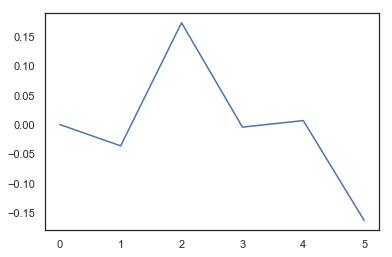

In [44]:
plt.plot(result)